In [1]:
import os
import sys
import numpy as np
import torch
from htmresearch.frameworks.pytorch.sparse_speech_experiment import SparseSpeechExperiment

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Select experiment

In [2]:
experiment_configuration = "experiments_paper.cfg"
experiment_name = "sparseCNN2"

In [3]:
# Load model
sys.argv = ['-c', experiment_configuration]
suite = SparseSpeechExperiment()
suite.parse_opt()
suite.parse_cfg()
path = suite.get_exp(experiment_name)[0]
results = suite.get_exps(path=path)[0]
model = torch.load(os.path.join(results, "model.pt"), map_location="cpu")


## Weight histogram

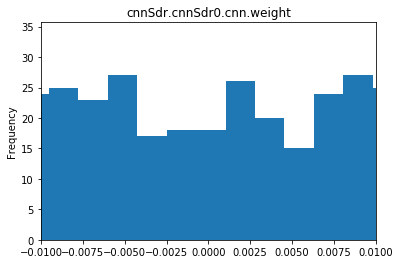

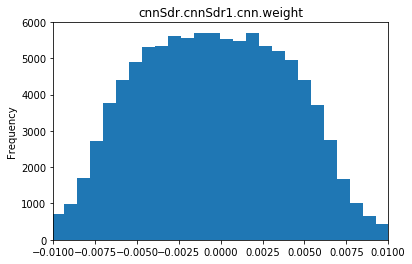

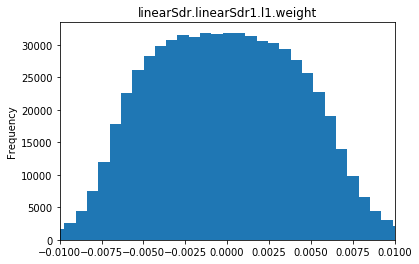

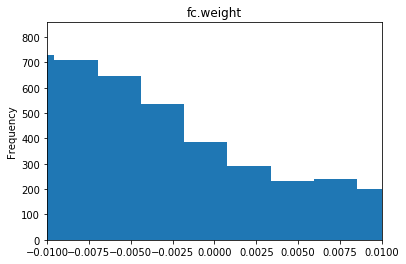

In [24]:
for k, v in model.named_parameters():
    if 'weight' in k:
        weights = v.view(-1).detach().numpy()
        weights = weights[weights!=0]
        plt.figure()
        plt.xlim(-0.01, 0.01)
        pd.Series(weights).plot(kind='hist', title=k, bins=100)

# Dutycycle histogram

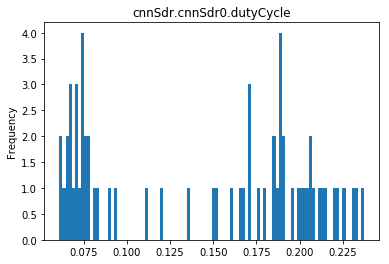

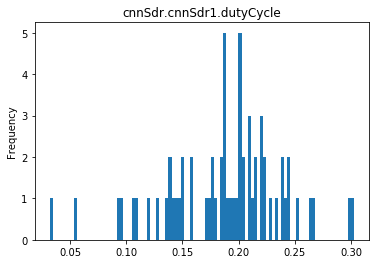

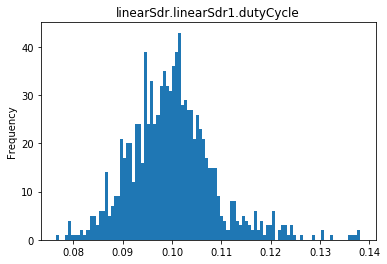

In [29]:
for k, v in model.named_buffers():
    if 'dutyCycle' in k:
        dutycycle = v.view(-1).detach().numpy()
        dutycycle = dutycycle[dutycycle!=0]
        plt.figure()
        pd.Series(dutycycle).plot(kind='hist', title=k, bins=100)